In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/danbi/userdata/DANBI/gugakwon/SejongMusic


In [46]:
from omegaconf import OmegaConf
from sejong_music.model_zoo import JeongganTransSeq2seq
from sejong_music.jg_code import JeongganDataset, JeongganTokenizer, ABCDataset, ABCTokenizer
from sejong_music.inference import JGInferencer, JGSimpleInferencer, ABCInferencer
from sejong_music.jg_to_staff_converter import JGToStaffConverter
from sejong_music.jeonggan_utils import JGConverter
from typing import List

In [3]:
config = OmegaConf.load('wandb/run-20240408_001703-2qe7mqg5/files/checkpoints/config.yaml')
dataset = ABCDataset(is_valid=True, is_pos_counter=True)
tokenizer = ABCTokenizer(None, None, json_fn='wandb/run-20240408_001703-2qe7mqg5/files/checkpoints/tokenizer_vocab.json')
dataset.tokenizer = tokenizer
model = JeongganTransSeq2seq(tokenizer, config.model)
inferencer = ABCInferencer(model, is_condition_shifted=True, is_orch=True)
import torch
state_dict = torch.load('wandb/run-20240408_001703-2qe7mqg5/files/checkpoints/inst_0/best_loss_model.pt', map_location='cpu')
model.load_state_dict(state_dict)
model.cuda()
model.eval()
None

['pad', 'start', 'end', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 21, 23, Fraction(1, 6), Fraction(1, 4), Fraction(1, 3), Fraction(1, 2), Fraction(7, 12), Fraction(2, 3), Fraction(3, 4), Fraction(5, 6), Fraction(7, 6), Fraction(4, 3), Fraction(3, 2), Fraction(5, 3), Fraction(7, 4), Fraction(11, 6), Fraction(7, 3), Fraction(5, 2), Fraction(8, 3), Fraction(17, 6), Fraction(10, 3), Fraction(11, 3), Fraction(23, 6), Fraction(13, 3), Fraction(9, 2), Fraction(14, 3), Fraction(17, 3), Fraction(35, 6), Fraction(19, 3), Fraction(20, 3), Fraction(23, 3), Fraction(59, 6), Fraction(38, 3), Fraction(7, 2), Fraction(11, 4), Fraction(17, 2), Fraction(13, 1), Fraction(15, 4), Fraction(19, 4), Fraction(11, 2), Fraction(5, 4), Fraction(15, 2), Fraction(13, 6), Fraction(19, 6), Fraction(29, 3), Fraction(32, 3), Fraction(44, 3), Fraction(23, 2), Fraction(9, 4), Fraction(31, 6), Fraction(29, 6), Fraction(34, 3), Fraction(22, 3), Fraction(16, 3), Fraction(53, 6), Fraction(77, 6), '하하배임', '하배황', '하배태', '하배중', '하

In [71]:
src, tgt, shifted_tgt = dataset[1]

source, output, _ = inferencer.inference(src, inst_name='daegeum')

  0%|          | 0/3000 [00:00<?, ?it/s]

['piri', 'haegeum', 'gayageum', 'geomungo']
[['임', 'piri'], [Fraction(1, 6), 'piri'], ['청황', 'piri'], [Fraction(1, 2), 'piri'], ['남', 'piri'], ['노네', 'piri'], [Fraction(1, 3), 'piri'], ['임', 'piri'], [Fraction(1, 2), 'piri'], ['겹요성표', 'piri'], [Fraction(1, 2), 'piri'], ['임', 'piri'], [Fraction(1, 6), 'piri'], ['청황', 'piri'], [Fraction(5, 6), 'piri'], ['임', 'piri'], [Fraction(2, 3), 'piri'], ['중', 'piri'], [7, 'piri'], ['쉼표', 'piri'], [Fraction(1, 3), 'piri'], ['태', 'piri'], [Fraction(1, 6), 'piri'], ['중', 'piri'], [Fraction(5, 6), 'piri'], ['중', 'piri'], [Fraction(2, 3), 'piri'], ['태', 'piri'], [Fraction(1, 3), 'piri'], ['남', 'piri'], [Fraction(2, 3), 'piri'], ['임', 'piri'], [Fraction(1, 3), 'piri'], ['중', 'piri'], [Fraction(5, 3), 'piri'], ['배남', 'piri'], [Fraction(1, 3), 'piri'], ['\n', 'piri'], ['태', 'piri'], ['나니로', 'piri'], [Fraction(3, 2), 'piri'], ['노', 'piri'], [Fraction(1, 6), 'piri'], ['중', 'piri'], [Fraction(1, 3), 'piri'], ['배남', 'piri'], [Fraction(1, 6), 'piri'], ['배임', 'p

In [72]:
source

[[':1', 'piri'],
 ['임', 'piri'],
 [':3', 'piri'],
 ['청황', 'piri'],
 [':8', 'piri'],
 ['남', 'piri'],
 ['노네', 'piri'],
 ['|', 'piri'],
 [':10', 'piri'],
 ['임', 'piri'],
 [':11', 'piri'],
 ['겹요성표', 'piri'],
 ['|', 'piri'],
 [':1', 'piri'],
 ['임', 'piri'],
 [':3', 'piri'],
 ['청황', 'piri'],
 ['|', 'piri'],
 [':2', 'piri'],
 ['임', 'piri'],
 [':8', 'piri'],
 ['중', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 [':8', 'piri'],
 ['쉼표', 'piri'],
 ['|', 'piri'],
 [':1', 'piri'],
 ['태', 'piri'],
 [':3', 'piri'],
 ['중', 'piri'],
 ['|', 'piri'],
 [':2', 'piri'],
 ['중', 'piri'],
 [':8', 'piri'],
 ['태', 'piri'],
 ['|', 'piri'],
 [':2', 'piri'],
 ['남', 'piri'],
 [':8', 'piri'],
 ['임', 'piri'],
 ['|', 'piri'],
 [':0', 'piri'],
 ['중', 'piri'],
 ['|', 'piri'],
 [':8', 'piri'],
 ['배남', 'piri'],
 ['|', 'piri'],
 ['', 'piri'],
 ['|', 'piri'],
 ['

In [31]:
print(output)
tokens = [x[0] for x in output]
tokens

[['태', 'beat:0', 'jg:0', 'gak:0', 'daegeum'], ['나니로', 'beat:0', 'jg:0', 'gak:0', 'daegeum'], [2, 'beat:0', 'jg:2', 'gak:0', 'daegeum'], ['배남', 'beat:0', 'jg:2', 'gak:0', 'daegeum'], [Fraction(1, 6), 'beat:1/6', 'jg:2', 'gak:0', 'daegeum'], ['배임', 'beat:1/6', 'jg:2', 'gak:0', 'daegeum'], [Fraction(1, 2), 'beat:2/3', 'jg:2', 'gak:0', 'daegeum'], ['쉼표', 'beat:2/3', 'jg:2', 'gak:0', 'daegeum'], [Fraction(1, 3), 'beat:0', 'jg:3', 'gak:0', 'daegeum'], ['태', 'beat:0', 'jg:3', 'gak:0', 'daegeum'], ['나니로', 'beat:0', 'jg:3', 'gak:0', 'daegeum'], [Fraction(11, 3), 'beat:2/3', 'jg:6', 'gak:0', 'daegeum'], ['쉼표', 'beat:2/3', 'jg:6', 'gak:0', 'daegeum'], [Fraction(1, 3), 'beat:0', 'jg:7', 'gak:0', 'daegeum'], ['중', 'beat:0', 'jg:7', 'gak:0', 'daegeum'], [1, 'beat:0', 'jg:8', 'gak:0', 'daegeum'], ['태', 'beat:0', 'jg:8', 'gak:0', 'daegeum'], [Fraction(1, 3), 'beat:1/3', 'jg:8', 'gak:0', 'daegeum'], ['중', 'beat:1/3', 'jg:8', 'gak:0', 'daegeum'], [Fraction(5, 3), 'beat:0', 'jg:10', 'gak:0', 'daegeum'], 

['태',
 '나니로',
 2,
 '배남',
 Fraction(1, 6),
 '배임',
 Fraction(1, 2),
 '쉼표',
 Fraction(1, 3),
 '태',
 '나니로',
 Fraction(11, 3),
 '쉼표',
 Fraction(1, 3),
 '중',
 1,
 '태',
 Fraction(1, 3),
 '중',
 Fraction(5, 3),
 '배남',
 Fraction(1, 6),
 '배임',
 Fraction(1, 2),
 '쉼표',
 Fraction(1, 3),
 '황',
 '니나',
 Fraction(1, 2),
 '니',
 Fraction(1, 6),
 '배남',
 Fraction(1, 3),
 '배임',
 Fraction(11, 3),
 '쉼표',
 Fraction(1, 3),
 '태',
 '나니로',
 Fraction(20, 3),
 '\n',
 '황',
 '니나',
 Fraction(1, 2),
 '니',
 Fraction(1, 6),
 '배남',
 Fraction(1, 3),
 '배임',
 2,
 '배임',
 '니나',
 Fraction(2, 3),
 '배남',
 '니레',
 Fraction(1, 3),
 '태',
 '나니로',
 Fraction(20, 3),
 '쉼표',
 Fraction(1, 3),
 '배남',
 0,
 '황',
 Fraction(1, 3),
 '태',
 Fraction(4, 3),
 '쉼표',
 Fraction(1, 3),
 '중',
 Fraction(2, 3),
 '태',
 Fraction(1, 6),
 '노',
 Fraction(1, 6),
 '중',
 1,
 '태',
 '니레',
 1,
 '\n',
 '황',
 '니나',
 Fraction(1, 2),
 '니',
 Fraction(1, 6),
 '배남',
 Fraction(1, 3),
 '배임',
 1,
 '황',
 Fraction(2, 3),
 '쉼표',
 Fraction(1, 3),
 '배임',
 '니나',
 Fraction(2, 3),
 '배남'

In [6]:
tokens = [x[0] for x in output]
# tokens = inferencer.tokenizer.decode(shifted_tgt)
notes, score = decoder.convert_abc_tokens(tokens)
score.show()

NameError: name 'output' is not defined

In [47]:
from sejong_music.jeonggan_utils import JGConverter, GencodeConverter
from typing import List
from fractions import Fraction



to_omr_converter = JGConverter(jeonggan_quarter_length=Fraction(1.0))
note_by_measure = group_by_attribute(notes, 'gak_offset')
self = to_omr_converter

part_text = []
for i, note_in_measure in enumerate(note_by_measure):
  conv_jgs = self.list_of_abc_notes_to_jeonggan(note_in_measure)
  text_jgs = self.jeonggan_note_to_text(conv_jgs)
  part_text.append('|'.join(text_jgs))
# part_text = '\n'.join(part_text)
part_text
GencodeConverter.convert_lines_to_gencode(part_text)

NameError: name 'group_by_attribute' is not defined

In [5]:
tokens

NameError: name 'tokens' is not defined

In [60]:
class ABCtoGenConverter:
  def __init__(self):
    self.to_omr_converter = JGConverter(jeonggan_quarter_length=Fraction(1.0))
    self.gencode_converter = GencodeConverter()
    self.decoder = JGToStaffConverter()
  
  @staticmethod
  def group_by_attribute(alist:List, attribute:str):
    outputs = []
    prev_attribute = None
    for a in alist:
      if prev_attribute is None:
        prev_attribute = getattr(a, attribute)
        outputs.append([a])
      elif getattr(a, attribute) == prev_attribute:
        outputs[-1].append(a)
      else:
        prev_attribute = getattr(a, attribute)
        outputs.append([a])
    return outputs
  
  def __call__(self, tokens:List[str]):
    notes, _ = self.decoder.convert_abc_tokens(tokens)
    note_by_measure = self.group_by_attribute(notes, 'gak_offset')
    part_text = []
    for i, note_in_measure in enumerate(note_by_measure):
      conv_jgs = self.to_omr_converter.list_of_abc_notes_to_jeonggan(note_in_measure)
      text_jgs = self.to_omr_converter.jeonggan_note_to_text(conv_jgs)
      part_text.append('|'.join(text_jgs))
    return self.gencode_converter.convert_lines_to_gencode(part_text)

abc2gen = ABCtoGenConverter()
abc2gen(source)

':1 임 :3 청황 :8 남 노네 | :10 임 :11 겹요성표 | :1 임 :3 청황 | :2 임 :8 중 |  |  |  |  |  |  | :8 쉼표 | :1 태 :3 중 | :2 중 :8 태 | :2 남 :8 임 | :0 중 | :8 배남 |  |  |  |  \n :0 태 나니로 | :6 노 :8 중 | :1 배남 :3 배임 :8 배남 | :2 태 :9 노 | :0 중 | :0 태 | :2 황 느니라 :6 니 :8 배남 | :0 배임 | :0 배임 니나 |  | :2 배임 :7 배남 :9 노 | :0 태 미는표 | :2 배남 :8 배임 | :2 황 :8 니나* | :0 배임 시루표 | :0 배임 니나 |  |  |  |  \n :2 배남 :6 배임 :8 배남 | :0 태 | :2 황 니나 :6 니 :8 배남 나느나 | :2 태 :9 노 | :0 중 | :0 태 | :2 황 느니라 :6 니 :8 배남 | :0 배임 | :2 배임 니나 :8 니나* | :2 배중 :8 배임 | :2 태 :6 노 :8 중 | :1 배남 :3 황 |  |  | :0 겹요성표 | :0 쉼표 |  |  |  |  \n :2 배남 :5 태 |  | :2 태 :8 황 | :0 중 니나 | :8 배남 | :0 태 | :2 황 니나 :6 니 :8 배남 | :2 배임 :8 배남 니레 | :2 황 :6 배남 반길이표/덧길이표 :7 배임 :9 배남 | :0 태 나니로 | :8 쉼표 | :1 태 :3 임 | :0 중 | :0 태 | :2 황 니나 :6 니 :8 배남 | :2 배임 :8 배남 니레 |  |  |  |  \n :1 태 :3 임 | :0 겹요성표 | :2 임 :8 임 니레 | :0 중 |  |  |  |  | :0 중 |  |  | :1 태 :3 임 낮게 | :2 중 :8 태 | :0 남 잉어질표 | :0 중 |  |  |  |  |  \n :0 태 |  | :1 배남 :3 배임 :8 배남 | :2 태 :8 황 | :0 중 | :0 태 | :2 황 니나 :8 배남 | :0 배임 |

In [71]:
GencodeConverter.convert_line_to_gencode(part_text[0])

':0 중 | :8 니레나 | :2 무 :8 임 나니나 | :2 중 :8 느니 | :2 임 :6 노 :8 무 느니-르 | :2 중 :8 임 니레 | :0 청황 | :7 청태 니레 :9 노 | :1 임 :3 중 :8 임 니레 | :2 청황 :8 무 | :0 임 느로니르 | :2 중 :8 느니 | :0 임 | :2 중 :7 임 니레 :9 중 | :2 태 :8 배임 노니로 | :2 황 :8 니나* | :2 중 :8 태 | :2 임 :8 무 | :0 청황 | :6 니나* :8 무'

In [47]:
note_in_measure

[ABCNote(중_, dur:5/3, 0, gak:0, jg:0),
 ABCNote(니레나_, dur:1/3, 5/3, gak:0, jg:1),
 ABCNote(무_, dur:2/3, 2, gak:0, jg:2),
 ABCNote(임_나니나, dur:1/3, 8/3, gak:0, jg:2),
 ABCNote(중_, dur:2/3, 3, gak:0, jg:3),
 ABCNote(느니_, dur:1/3, 11/3, gak:0, jg:3),
 ABCNote(임_, dur:1/2, 4, gak:0, jg:4),
 ABCNote(노_, dur:1/6, 9/2, gak:0, jg:4),
 ABCNote(무_느니-르, dur:1/3, 14/3, gak:0, jg:4),
 ABCNote(중_, dur:2/3, 5, gak:0, jg:5),
 ABCNote(임_니레, dur:1/3, 17/3, gak:0, jg:5),
 ABCNote(청황_, dur:5/3, 6, gak:0, jg:6),
 ABCNote(청태_니레, dur:1/6, 23/3, gak:0, jg:7),
 ABCNote(노_, dur:1/6, 47/6, gak:0, jg:7),
 ABCNote(임_, dur:1/6, 8, gak:0, jg:8),
 ABCNote(중_, dur:1/2, 49/6, gak:0, jg:8),
 ABCNote(임_니레, dur:1/3, 26/3, gak:0, jg:8),
 ABCNote(청황_, dur:2/3, 9, gak:0, jg:9),
 ABCNote(무_, dur:1/3, 29/3, gak:0, jg:9),
 ABCNote(임_느로니르, dur:1, 10, gak:0, jg:10),
 ABCNote(중_, dur:2/3, 11, gak:0, jg:11),
 ABCNote(느니_, dur:1/3, 35/3, gak:0, jg:11),
 ABCNote(임_, dur:1, 12, gak:0, jg:12),
 ABCNote(중_, dur:2/3, 13, gak:0, jg:13),
 A

In [48]:
conv_jgs

[[(' 중', Fraction(5, 3), Fraction(0, 1))],
 [(' 니레나', Fraction(1, 3), Fraction(0, 1))],
 [(' 무', Fraction(2, 3), Fraction(0, 1)),
  (' 임_나니나', Fraction(1, 3), Fraction(0, 1))],
 [(' 중', Fraction(2, 3), Fraction(0, 1)),
  (' 느니', Fraction(1, 3), Fraction(0, 1))],
 [(' 임', Fraction(1, 2), Fraction(0, 1)),
  (' 노', Fraction(1, 6), Fraction(0, 1)),
  (' 무_느니-르', Fraction(1, 3), Fraction(0, 1))],
 [(' 중', Fraction(2, 3), Fraction(0, 1)),
  (' 임_니레', Fraction(1, 3), Fraction(0, 1))],
 [(' 청황', Fraction(5, 3), Fraction(0, 1))],
 [(' 청태_니레', Fraction(1, 6), Fraction(0, 1)),
  (' 노', Fraction(1, 6), Fraction(0, 1))],
 [(' 임', Fraction(1, 6), Fraction(0, 1)),
  (' 중', Fraction(1, 2), Fraction(0, 1)),
  (' 임_니레', Fraction(1, 3), Fraction(0, 1))],
 [(' 청황', Fraction(2, 3), Fraction(0, 1)),
  (' 무', Fraction(1, 3), Fraction(0, 1))],
 [(' 임_느로니르', 1, Fraction(0, 1))],
 [(' 중', Fraction(2, 3), Fraction(0, 1)),
  (' 느니', Fraction(1, 3), Fraction(0, 1))],
 [(' 임', 1, Fraction(0, 1))],
 [(' 중', Fraction

4

In [19]:
for note in notes:
  print(note, note.gak_offset, note.jg_offset)

ABCNote(중_, 5/3, 0, False) 0 0
ABCNote(니레나_, 1/3, 5/3, False) 0 1
ABCNote(무_, 2/3, 2, False) 0 2
ABCNote(임_나니나, 1/3, 8/3, False) 0 2
ABCNote(중_, 2/3, 3, False) 0 3
ABCNote(느니_, 1/3, 11/3, False) 0 3
ABCNote(임_, 1/2, 4, False) 0 4
ABCNote(노_, 1/6, 9/2, False) 0 4
ABCNote(무_느니-르, 1/3, 14/3, False) 0 4
ABCNote(중_, 2/3, 5, False) 0 5
ABCNote(임_니레, 1/3, 17/3, False) 0 5
ABCNote(청황_, 5/3, 6, False) 0 6
ABCNote(청태_니레, 1/6, 23/3, False) 0 7
ABCNote(노_, 1/6, 47/6, False) 0 7
ABCNote(임_, 1/6, 8, False) 0 8
ABCNote(중_, 1/2, 49/6, False) 0 8
ABCNote(임_니레, 1/3, 26/3, False) 0 8
ABCNote(청황_, 2/3, 9, False) 0 9
ABCNote(무_, 1/3, 29/3, False) 0 9
ABCNote(임_느로니르, 1, 10, False) 0 10
ABCNote(중_, 2/3, 11, False) 0 11
ABCNote(느니_, 1/3, 35/3, False) 0 11
ABCNote(임_, 1, 12, False) 0 12
ABCNote(중_, 2/3, 13, False) 0 13
ABCNote(임_니레, 1/6, 41/3, False) 0 13
ABCNote(중_, 1/6, 83/6, False) 0 13
ABCNote(태_, 2/3, 14, False) 0 14
ABCNote(배임_노니로, 1/3, 44/3, False) 0 14
ABCNote(황_, 2/3, 15, False) 0 15
ABCNote(니나*_, 1/3

Unknown pitch 청협 in ABCNote(청협_, 1, 0, False)
Unknown ornament 미는표 in ABCNote(청중_미는표, 2/3, 4, False)
Unknown pitch 청무 in ABCNote(청무_, 1, 8, False)
Unknown ornament 농음표 in ABCNote(청중_농음표, 5/3, 11, False)
Unknown ornament 떠이어표 in ABCNote(청임_떠이어표, 2/3, 13, False)
Unknown pitch 청무 in ABCNote(청무_, 2/3, 52/3, False)
Unknown pitch 청무 in ABCNote(청무_, 2/3, 55/3, False)


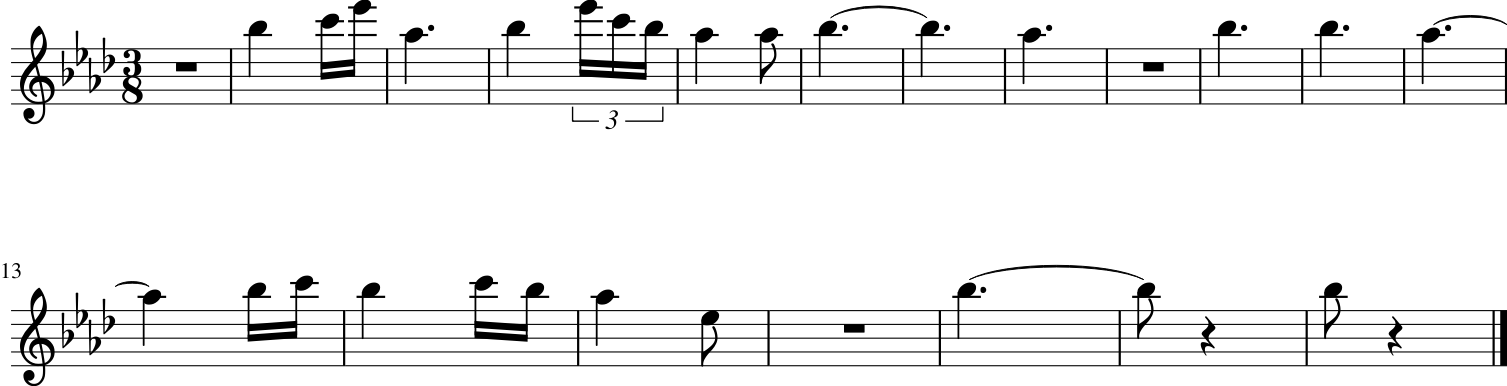

In [29]:
from typing import List
from sejong_music.jg_to_staff_converter import Note, JGToStaffConverter

cls = JGToStaffConverter
decoder = cls()

class ABCNote:
  def __init__(self, pitch:List[str], duration:float, global_offset:float):
    self.pitch = pitch[0]
    self.ornaments = pitch[1:]
    self.duration = duration
    self.global_offset = global_offset
    self.is_rest = self.pitch == '쉼표'
    self.midi_pitch = None
    self.m21_notes = []

  def __repr__(self) -> str:
    return f"ABCNote({self.pitch}_{'_'.join(self.ornaments)}, {self.duration}, {self.global_offset}, {self.is_rest})"


global_offset = 0
jg_offset = 0
gak_offset = 0
prev_pos = None
prev_note = []
total_notes = []
prev_duration = 0

for token in tokens:
  if token == '' or token in ('pad', 'start', 'end'): continue
  if token in cls.dur_tokens:
    duration = token
    if prev_note:
      total_notes.append(ABCNote(prev_note, duration, global_offset))
      prev_note = []
    global_offset += duration
    jg_offset += duration
  elif token  == '\n':
    gak_offset += 1
    jg_offset = 0
  else:
    prev_note.append(token)
# total_notes 
decoder.create_m21_notes(total_notes, verbose=True)
stream = decoder.convert_m21_notes_to_stream(total_notes)
stream.show()



In [32]:
tokens

['청협',
 1,
 '청임',
 Fraction(2, 3),
 '느니',
 Fraction(1, 3),
 '청중',
 1,
 '청임',
 Fraction(2, 3),
 '니레나',
 Fraction(1, 3),
 '청중',
 '미는표',
 Fraction(2, 3),
 '청중',
 Fraction(1, 3),
 '청임',
 2,
 '\n',
 '청중',
 1,
 '청무',
 1,
 '청임',
 1,
 '청임',
 1,
 '청중',
 '농음표',
 Fraction(5, 3),
 '느니',
 Fraction(1, 3),
 '\n',
 '청임',
 '떠이어표',
 Fraction(2, 3),
 '니나*',
 Fraction(1, 3),
 '청중',
 Fraction(2, 3),
 '청황',
 Fraction(1, 3),
 '쉼표',
 1,
 '청임',
 Fraction(4, 3),
 '청무',
 Fraction(2, 3),
 '청임',
 Fraction(1, 3),
 '청무',
 Fraction(2, 3)]

In [31]:
' '.join(tokens)

TypeError: sequence item 1: expected str instance, int found

In [4]:
decoder = JGToStaffConverter(dur_ratio=1.5)

In [ ]:
from sejong_music.jg_to_staff_converter import SigimsaeConverter

self = decoder
scale = None

if isinstance(tokens, str):
  tokens = tokens.split(' ')

notes = self.convert_to_notes(tokens)
if scale is None:
  scale, exceptional_pitches = self.get_scale(notes)
print(f'scale: {scale}')
if len(scale) < 4: 
  self.pitch_converter = SigimsaeConverter() # use default scale
else:
  self.pitch_converter = SigimsaeConverter(scale=scale, exceptional_pitches=exceptional_pitches)
self._fix_three_col_division(notes)
self.get_duration_of_notes(notes)
notes


In [1]:
from sejong_music.jg_code import JeongganDataset, JeongganTokenizer, ABCDataset, ABCTokenizer
from sejong_music.model_zoo import JeongganTransSeq2seq
from sejong_music.inference import JGInferencer, JGSimpleInferencer, ABCInferencer


abc_set = ABCDataset(is_valid=True)

ModuleNotFoundError: No module named 'sejong_music'

In [109]:
tokens = abc_set.tokenizer.decode(abc_set[0][2])

In [110]:
tokens

['임',
 '니나',
 2,
 '중',
 1,
 '태',
 Fraction(1, 2),
 '노',
 Fraction(1, 6),
 '중',
 Fraction(1, 3),
 '태',
 '너녜',
 Fraction(2, 3),
 '쉼표',
 Fraction(1, 3),
 '\n',
 '임',
 Fraction(1, 6),
 '청황',
 Fraction(1, 3),
 '니',
 Fraction(1, 6),
 '남',
 Fraction(1, 3),
 '임',
 Fraction(1, 2),
 '니',
 Fraction(1, 6),
 '느나',
 '반길이표/덧길이표',
 Fraction(1, 3),
 '임',
 Fraction(1, 6),
 '청황',
 Fraction(1, 3),
 '니',
 Fraction(1, 6),
 '임',
 '노니로',
 Fraction(1, 3),
 '중',
 Fraction(1, 3),
 '쉼표',
 Fraction(1, 3),
 '중',
 7,
 '쉼표',
 Fraction(1, 3),
 '태',
 Fraction(1, 3),
 '임',
 Fraction(5, 3),
 '중',
 1,
 '태',
 Fraction(11, 6),
 '배남',
 Fraction(1, 6),
 '\n',
 '태',
 '나니로',
 Fraction(3, 2),
 '노',
 Fraction(1, 6),
 '중',
 Fraction(1, 3),
 '배남',
 Fraction(1, 6),
 '배임',
 Fraction(1, 2),
 '쉼표',
 Fraction(1, 3),
 '태',
 Fraction(5, 6),
 '노',
 Fraction(1, 6),
 '중',
 1,
 '태',
 1,
 '황',
 '니나',
 Fraction(1, 2),
 '니',
 Fraction(1, 6),
 '배남',
 Fraction(1, 3),
 '배임',
 1,
 '배임',
 '니나',
 2,
 '배임',
 '니나',
 Fraction(2, 3),
 '배남',
 '니레',
 Fracti

In [99]:
abc_set.all_pieces[0].name

'남창우조 두거'

Unknown ornament 반길이표/덧길이표 in ABCNote(느나_반길이표/덧길이표, 1/3, 20/3, False)


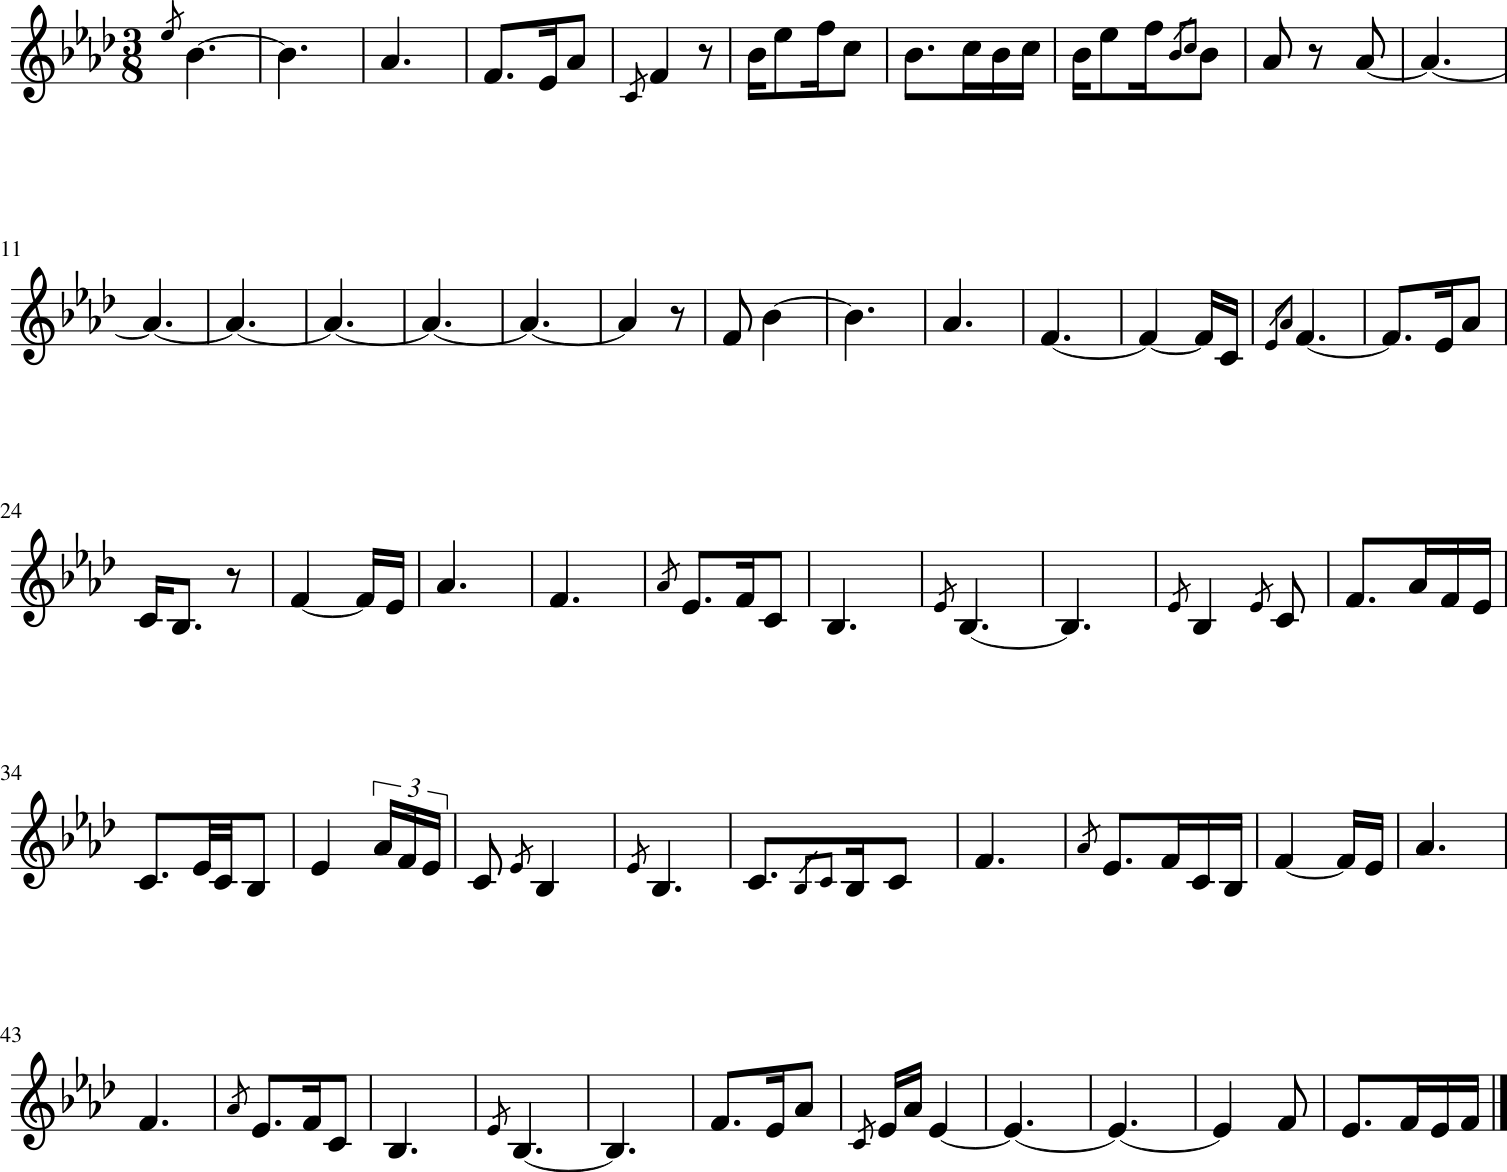

In [112]:
from typing import List
from sejong_music.jg_to_staff_converter import Note, JGToStaffConverter

cls = JGToStaffConverter

class ABCNote:
  def __init__(self, pitch:List[str], duration:float, global_offset:float):
    self.pitch = pitch[0]
    self.ornaments = pitch[1:]
    self.duration = duration
    self.global_offset = global_offset
    self.is_rest = self.pitch == '쉼표'
    self.midi_pitch = None
    self.m21_notes = []

  def __repr__(self) -> str:
    return f"ABCNote({self.pitch}_{'_'.join(self.ornaments)}, {self.duration}, {self.global_offset}, {self.is_rest})"


global_offset = 0
jg_offset = 0
gak_offset = 0
prev_pos = None
prev_note = []
total_notes = []
prev_duration = 0

for token in tokens:
  if token == '' or token in ('pad', 'start', 'end'): continue
  if token in cls.dur_tokens:
    duration = token
    if prev_note:
      total_notes.append(ABCNote(prev_note, duration, global_offset))
      prev_note = []
    global_offset += duration
    jg_offset += duration
  elif token  == '\n':
    gak_offset += 1
    jg_offset = 0
  else:
    prev_note.append(token)
# total_notes 
self.create_m21_notes(total_notes, verbose=True)
stream = self.convert_m21_notes_to_stream(total_notes)
stream.show()



In [93]:
type(total_notes[76].m21_notes[0])

music21.note.Note

In [88]:
total_notes[76].m21_notes[0].quarterLength

0.0

In [92]:
total_notes[77]

ABCNote(황_, 1/6, 48, False)

In [94]:
import music21
stream = music21.stream.Stream()
stream.append(total_notes[76].m21_notes[0])
stream.show()

MusicXMLExportException: In part (None), measure (1): Cannot convert durations without types to MusicXML.

In [60]:
stream

<music21.stream.Stream 0x7fc4d3f65a90>

In [61]:
for note in total_notes:
  for mnote in note.m21_notes:
    print(mnote.pitch, mnote.duration.quarterLength)
  

E-5 0.0
E-5 0.0
B-4 3.0
B-4 3.0
A-4 1.5
A-4 1.5
F4 0.75
F4 0.75
E-4 0.25
E-4 0.25
A-4 0.5
A-4 0.5
C4 0.0
C4 0.0
F4 1.0
F4 1.0


AttributeError: 'Rest' object has no attribute 'pitch'

In [23]:
decoder(' '.join(tokens))

([Note 배황(51)_슬기둥2 :2 @ 0+0 / 2,
  Note 배황(51)_ :0 @ 2+0 / 1,
  Note 하배황(39)_ :0 @ 3+0 / 1,
  Note 배황(51)_ :0 @ 4+0 / 1,
  Note 배황(51)_슬기둥2 :2 @ 5+0 / 2,
  Note 배황(51)_ :2 @ 7+0 / 2/3,
  Note 배중(56)_자출 :8 @ 7+2/3 / 1/3,
  Note 배중(56)_슬기둥2 :2 @ 8+0 / 2,
  Note 배중(56)_ :0 @ 10+0 / 1,
  Note 하배황(39)_ :0 @ 11+0 / 1,
  Note 배중(56)_ :0 @ 12+0 / 1,
  Note 배중(56)_슬기둥2 :2 @ 13+0 / 2,
  Note 배황(51)_ :2 @ 15+0 / 1/3,
  Note 배황(51)_ :5 @ 15+1/3 / 2/3,
  Note 배황(51)_ :0 @ 16+0 / 2,
  Note 하배임(46)_ :0 @ 18+0 / 1,
  Note 하배임(46)_ :0 @ 19+0 / 1,
  Note 배황(51)_ :0 @ 20+0 / 1,
  Note 배중(56)_슬기둥2 :2 @ 21+0 / 2,
  Note 배황(51)_ :2 @ 23+0 / 1/3,
  Note 배황(51)_ :5 @ 23+1/3 / 2/3,
  Note 하배임(46)_ :0 @ 24+0 / 1,
  Note 하배임(46)_ :0 @ 25+0 / 1,
  Note 하배임(46)_ :0 @ 26+0 / 1,
  Note 배황(51)_ :2 @ 27+0 / 2/3,
  Note 배황(51)_ :8 @ 27+2/3 / 4/3,
  Note 하배임(46)_ :0 @ 29+0 / 1,
  Note 하배임(46)_ :0 @ 30+0 / 1,
  Note 배황(51)_ :0 @ 31+0 / 1,
  Note 하배임(46)_슬기둥3 :2 @ 32+0 / 2,
  Note 하배임(46)_ :0 @ 34+0 / 1,
  Note 하배임(46)_ :

In [6]:
src, tgt, shifted_tgt = dataset[50]
device = 'cuda'
input_part_idx = src[0][-1]
target_part_idx = model.tokenizer.vocab[tgt[0][-1].item()]
# if input_part_idx < 2: continue
src, output, attn_map = inferencer.inference(src.to(device), target_part_idx)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
da

In [10]:
decoder.convert_inference_result(output, src, model.tokenizer.decode(shifted_tgt))

pitch 0 not in midi scales
note.midi_pitch is None in Note 전성(None)_느니-르 :8 @ 67+2/3 / -1/3
pitch None not in midi scales
note.midi_pitch is None in Note 쉼표(None)_덧길이표_리_청태_특강표 :0 @ 76+0 / 2/3
note.midi_pitch is None in Note 쉼표(None)_덧길이표_리_청태_특강표 :0 @ 76+0 / 2/3
note.midi_pitch is None in Note 쉼표(None)_덧길이표_리_청태_특강표 :0 @ 76+0 / 2/3
note.midi_pitch is None in Note 쉼표(None)_덧길이표_리_청태_특강표 :0 @ 76+0 / 2/3
pitch 84 not in midi scales


TypeError: 'NoneType' object is not subscriptable